<a href="https://colab.research.google.com/github/susanaescamilla679-coder/Estadistica2025B/blob/main/SPROYECTOU4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

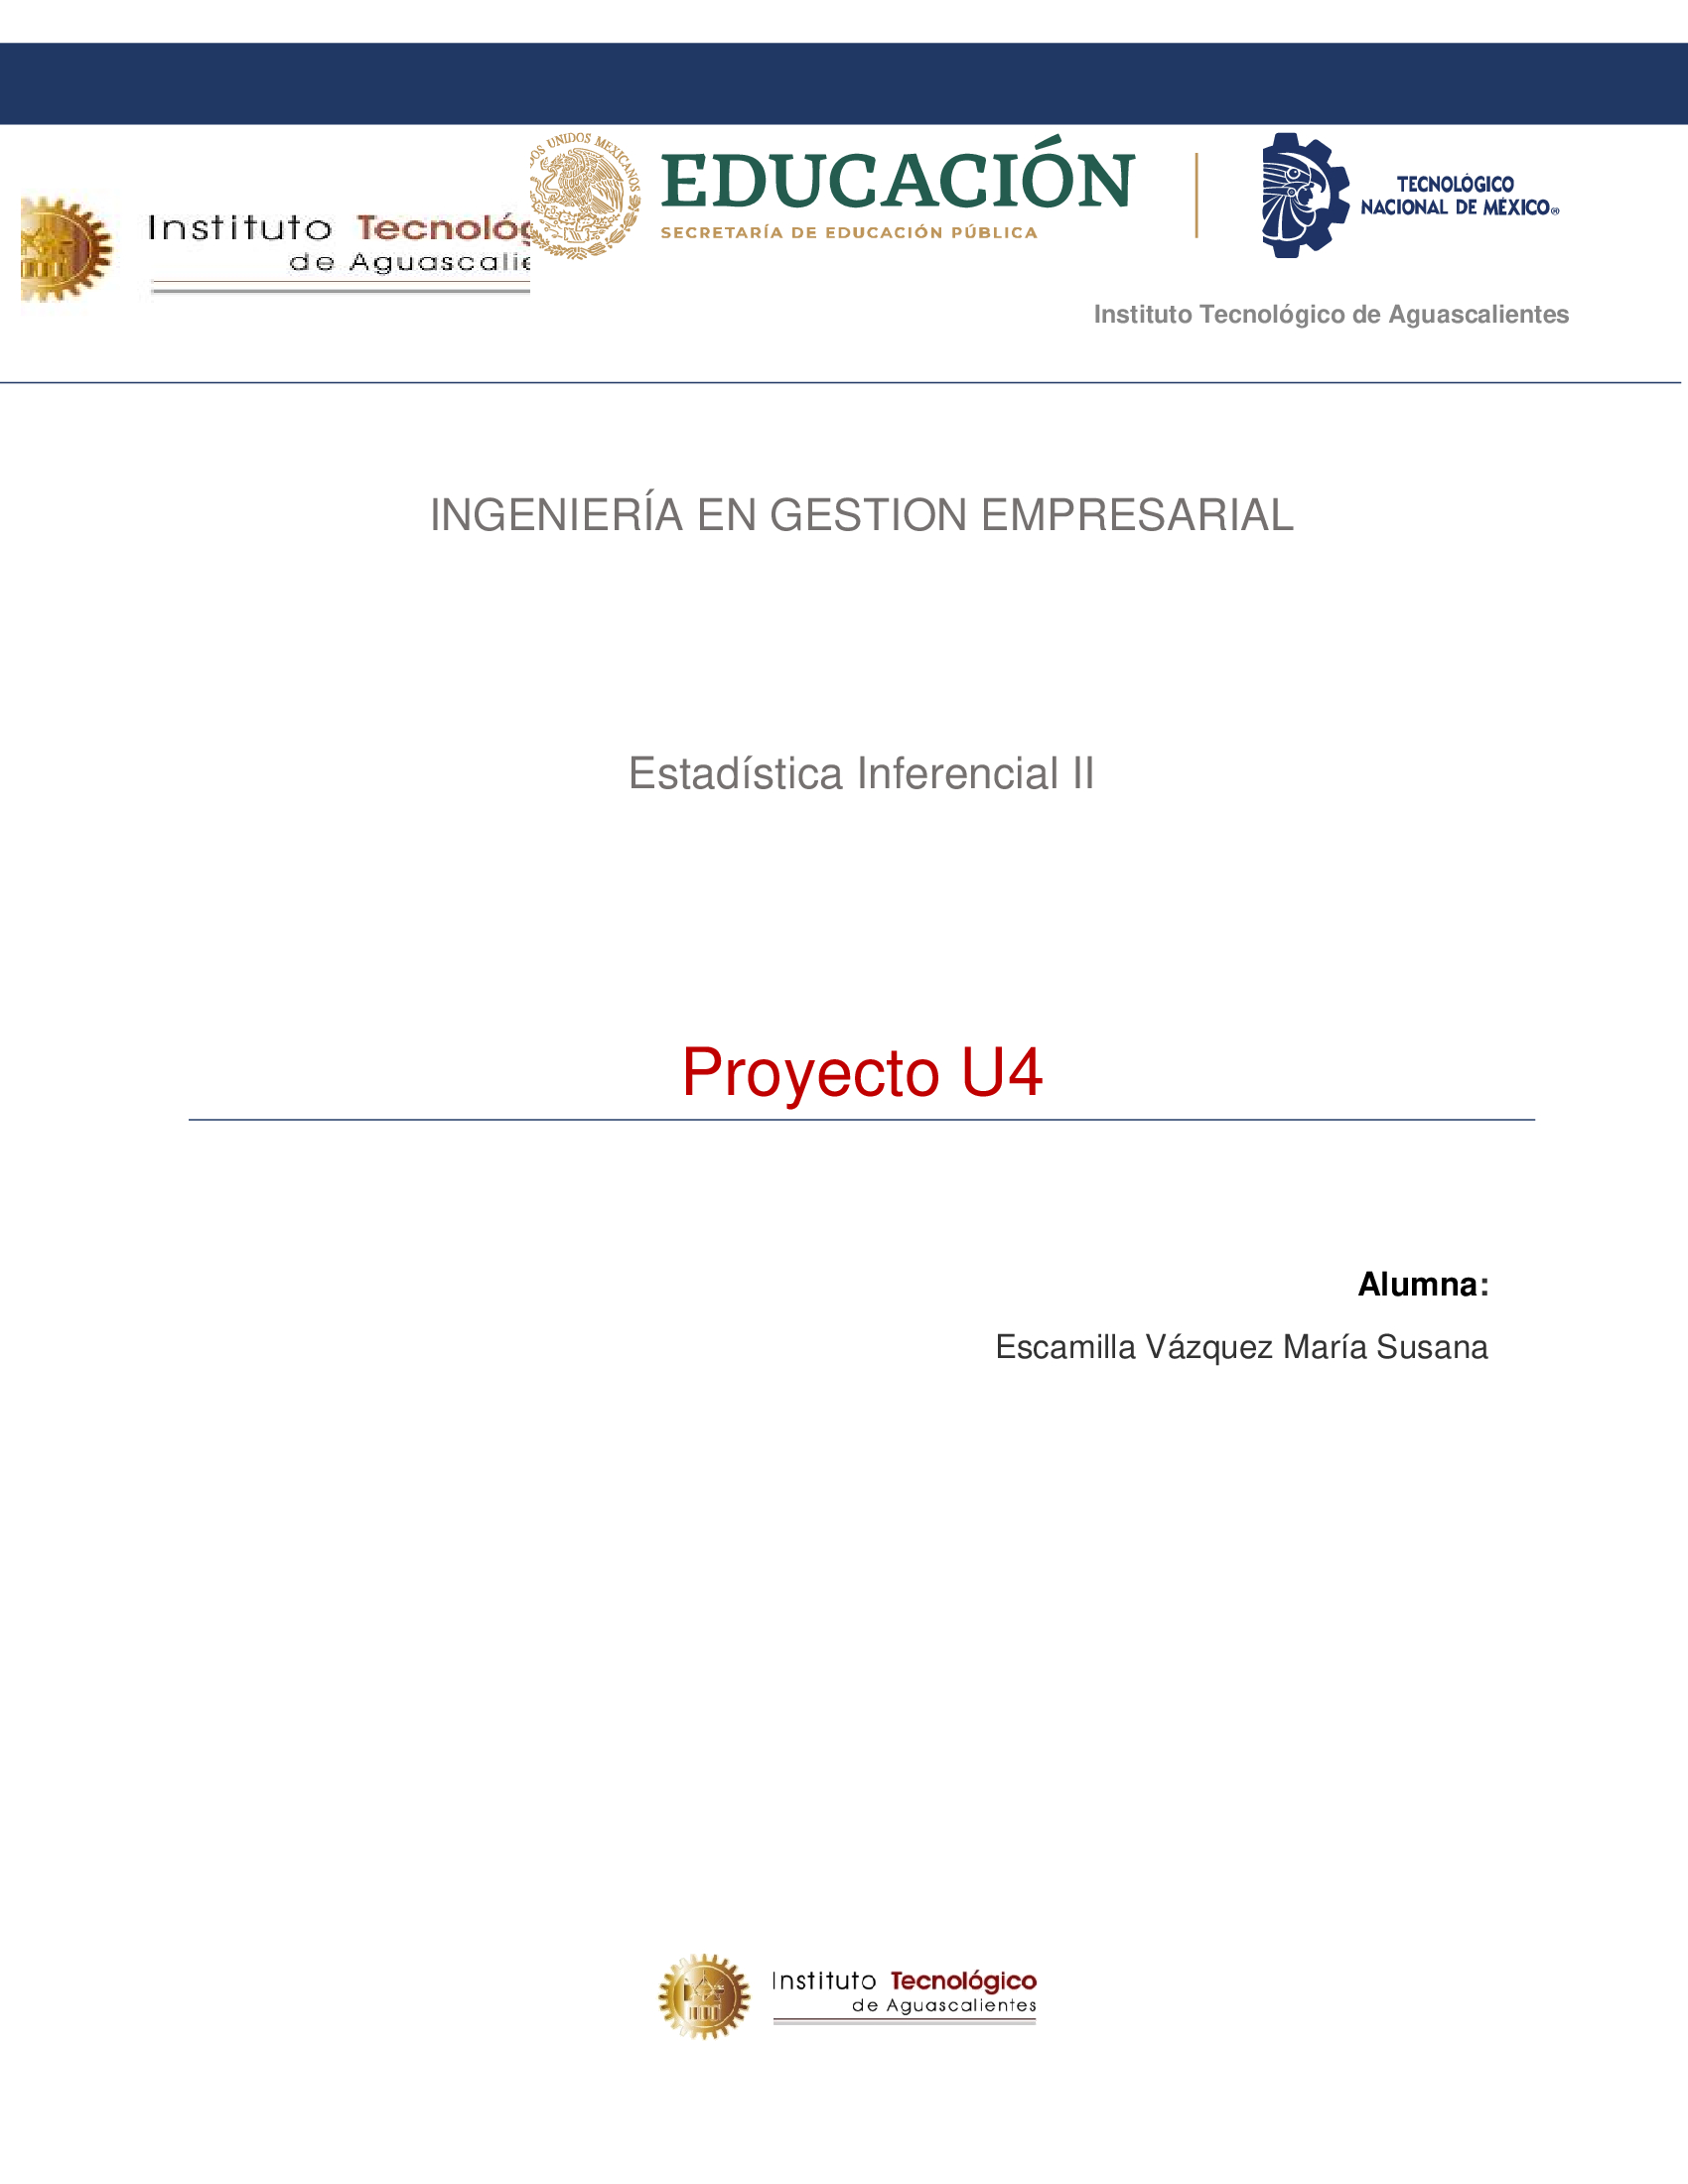

**Introduccion**:

El presente estudio tiene como propósito analizar los factores que influyen en el rendimiento académico de los estudiantes utilizando un conjunto de datos que incluye información socioeconómica, demográfica, escolar y familiar. Para ello, se aplicaron pruebas estadísticas de comparación de medias, específicamente análisis de varianza (ANOVA) y pruebas post hoc de Tukey, con el fin de identificar si existen diferencias significativas en los puntajes obtenidos entre distintos grupos de estudiantes según variables como género, acceso a datos, nivel socioeconómico, discapacidad, nivel educativo de los padres, distancia a la escuela, entre otras.

Este análisis nos permite comprender cómo distintos factores externos e internos al entorno escolar pueden impactar el desempeño académico, ofreciendo evidencia útil para la toma de decisiones en instituciones educativas y para la implementación de políticas enfocadas en mejorar el aprendizaje.

**2. Marco Teórico**
**2.1 Rendimiento académico**

El rendimiento académico se define como el nivel de logro demostrado por un estudiante respecto a los objetivos educativos establecidos. Depende de factores personales, familiares, sociales y escolares que pueden influir positiva o negativamente.

**2.2 Análisis de Varianza (ANOVA)**

El ANOVA es una técnica estadística que permite comparar las medias de tres o más grupos para determinar si existen diferencias significativas entre ellos.

H0: Todas las medias son iguales

H1: Al menos una media es diferente

Cuando el valor p es menor a 0.05, se rechaza H0.

**2.3 Prueba post hoc de Tukey**

Cuando el ANOVA muestra diferencias significativas, la prueba de Tukey permite identificar específicamente qué grupos difieren entre sí. Esto ayuda a profundizar el análisis del efecto de las variables categóricas.

**2.4 Tamaño del efecto (η²)**

El tamaño del efecto indica qué tan grande es la influencia de la variable independiente sobre la dependiente. Los valores suelen interpretarse así:

0.01 → pequeño

0.06 → mediano

0.14 o más → grande

El η² permite complementar los resultados del ANOVA, mostrando no solo si hay diferencias significativas, sino también la magnitud de dichas diferencias.

**3. Metodología**

Carga y limpieza de datos
Se importó el dataset desde un archivo CSV en GitHub y posteriormente se eliminaron valores faltantes mediante df.dropna().

**Variables analizadas**

El archivo contiene múltiples variables categóricas como:

*Acceso a datos
*Programa de apoyo
*Nivel socioeconómico
*Tipo de discapacidad
*Nivel educativo de los padre
*Distancia a la escuela
*Género
*Entre otras.

La variable dependiente en todos los análisis fue el puntaje académico del estudiante.

**Procedimiento estadístico**

-Se ejecutaron pruebas ANOVA unifactorial para cada variable independiente.

-Posteriormente se aplicó la prueba de Tukey para grupos con diferencias significativas.

-Se calculó el tamaño del efecto (η²) para determinar la magnitud de las diferencias.


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/susanaescamilla679-coder/Estadistica2025B/refs/heads/main/dataset.csv"
df = pd.read_csv(url)
df = df.dropna()
df

,horas_estudio,asistencia,participacion_parental,acceso_a_recursos,actividades_extracurriculares,horas_suenio,calificaciones_previas,nivel_motivacion,acceso_internet,sesiones_tutoria,ingreso_familiar,calidad_profesorado,tipo_escuela,influencia_companieros,actividad_fisica,discapacidad_aprendizaje,nivel_estudio_padres,distancia,genero,puntaje_examen
0,23,84,bajo,elevado,no,7,73,bajo,si,0,bajo,medio,publico,positivo,3,no,preparatoria,cercano,hombre,67
1,19,64,bajo,medio,no,8,59,bajo,si,2,medio,bajo,publico,negativo,4,no,universidad,moderado,mujer,61
2,24,98,medio,bajo,si,7,91,medio,si,2,medio,bajo,publico,neutral,4,no,posgrado,cercano,hombre,74
3,29,89,bajo,medio,si,8,98,medio,si,1,medio,bajo,publico,negativo,4,no,preparatoria,moderado,hombre,71
4,19,92,medio,bajo,si,6,65,medio,si,3,medio,elevado,publico,neutral,4,no,universidad,cercano,mujer,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,elevado,medio,no,7,76,medio,si,1,elevado,medio,publico,positivo,2,no,preparatoria,cercano,mujer,68
6603,23,76,elevado,medio,no,8,81,medio,si,3,bajo,elevado,publico,positivo,2,no,preparatoria,cercano,mujer,69
6604,20,90,medio,bajo,si,6,65,bajo,si,3,bajo,medio,publico,negativo,2,no,posgrado,cercano,mujer,68
6605,10,86,elevado,elevado,si,6,91,elevado,si,2,bajo,medio,privado,positivo,3,no,preparatoria,lejano,mujer,68


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Nivel de significancia = 0.05
# H0: Todas las medias son iguales
# H1: Al menos una media es distinta

# Realizar el modelo ANOVA de dos vías
modelo_lineal = ols(f'puntaje_examen ~ horas_estudio + asistencia + horas_suenio + calificaciones_previas + sesiones_tutoria + actividad_fisica + C(participacion_parental) + C(acceso_a_recursos) + C(actividades_extracurriculares) + C(nivel_motivacion) + C(acceso_internet) + C(ingreso_familiar) + C(calidad_profesorado) + C(tipo_escuela) + C(influencia_companieros) + C(discapacidad_aprendizaje) + C(nivel_estudio_padres) + C(distancia) + C(genero)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal, typ=2)
tabla_anova

,sum_sq,df,F,PR(>F)
C(participacion_parental),2934.495355,2.0,333.048013,2.839802e-138
C(acceso_a_recursos),2614.915722,2.0,296.777599,6.082330e-124
C(actividades_extracurriculares),474.735679,1.0,107.759431,4.809221e-25
C(nivel_motivacion),869.647999,2.0,98.699948,6.136556e-43
C(acceso_internet),374.929769,1.0,85.104660,3.779018e-20
C(ingreso_familiar),1053.895937,2.0,119.611008,1.019015e-51
C(calidad_profesorado),524.860600,2.0,59.568600,2.340878e-26
C(tipo_escuela),1.940406,1.0,0.440449,5.069297e-01
C(influencia_companieros),967.444992,2.0,109.799333,1.320573e-47
C(discapacidad_aprendizaje),449.456984,1.0,102.021464,8.303936e-24


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
   bajo elevado   1.7334   0.0  1.4042  2.0626   True
   bajo   medio   0.7344   0.0  0.4363  1.0326   True
elevado   medio   -0.999   0.0 -1.2636 -0.7344   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

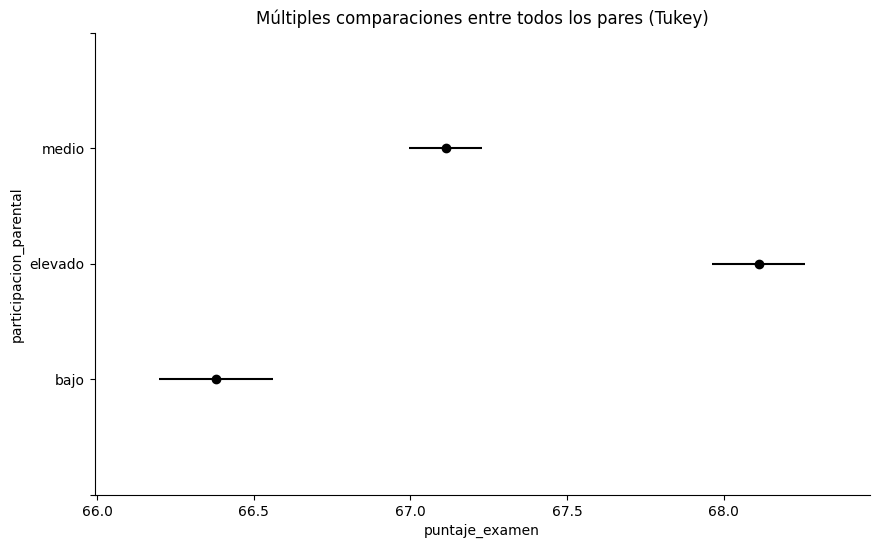

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['participacion_parental'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="participacion_parental", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(participacion_parental)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.030


**ANOVA:**
Este arrojó un valor p pequeño (p < 0.001), por lo que sí hay diferencias significativas

**Tukey:**
Se observa que si hay diferencias significativas entre todos los pares de grupos

**(η² = 0.030)**:
Este nos indica que la participación parental influye en el puntaje, pero no explica la proporción de la variabilidad.



 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
   bajo elevado   1.4212   0.0  1.1539  1.6885   True
   bajo   medio   0.6001   0.0  0.3157  0.8845   True
elevado   medio  -0.8211   0.0 -1.1309 -0.5113   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

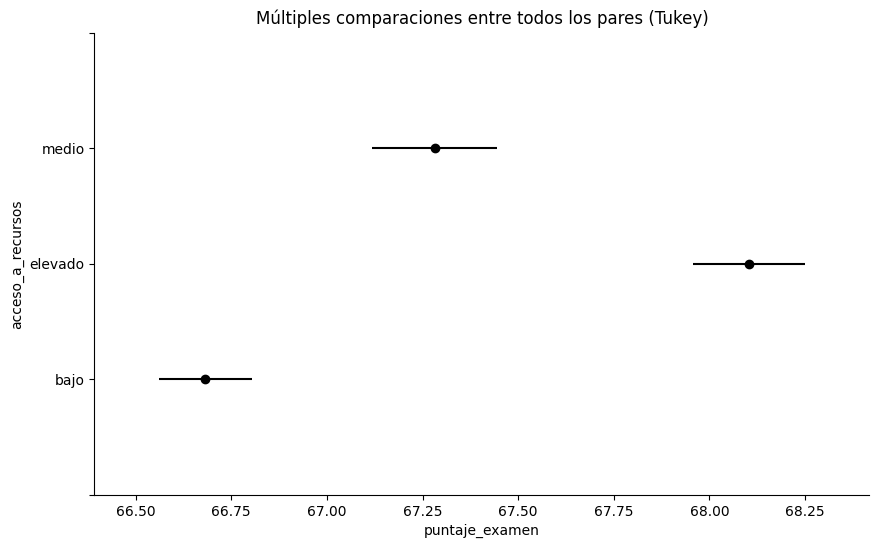

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['acceso_a_recursos'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="acceso_a_recursos", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(acceso_a_recursos)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.026


ANOVA:
Con esto se encontraron diferencias significativas entre los grupos observados.

Tukey:
Los grupos presentan diferencias significativas, las cuales favorecen al grupo con mayor acceso a los datos.

Eta cuadrado (η² = 0.026):
Los recursos tiene un efecto real y hay diferencia significativa sobre el puntaje, aunque sea baja.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    no     si   0.5032   0.0 0.3077 0.6987   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

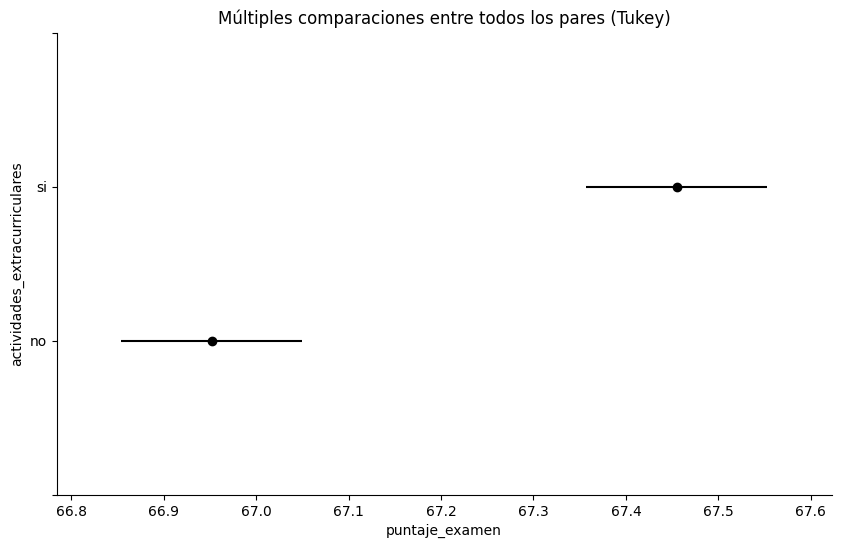

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['actividades_extracurriculares'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="actividades_extracurriculares", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(actividades_extracurriculares)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.005


ANOVA:
Existe una diferencia significativa entre los estudiantes que sí y que no realizan actividades .

Tukey:
Existen diferencias significativas por lo que quienes participaron obtienen mejores puntajes.

Eta cuadrado:
El participar en las actividades extracurriculares hace que mejore el rendimiento, aunque sea reducido.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
   bajo elevado   0.9794    0.0  0.6474 1.3115   True
   bajo   medio   0.5744    0.0  0.3086 0.8402   True
elevado   medio   -0.405 0.0048 -0.7071 -0.103   True
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

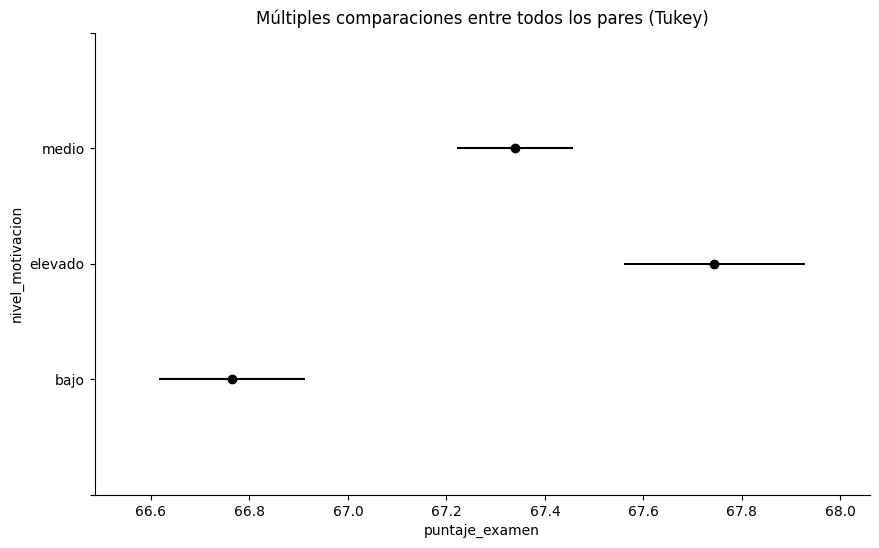

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['nivel_motivacion'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="nivel_motivacion", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(nivel_motivacion)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.009


ANOVA:
Hay diferencia significativas entre niveles de motivación.


Tukey:
Aqui todos los niveles tienen diferencias entre sí.

Eta cuadrado (η² = 0.009**):
La motivación si llega a influir estadísticamente, pero su impacto llega a ser bajo.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    no     si   0.7549   0.0 0.3929 1.1169   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

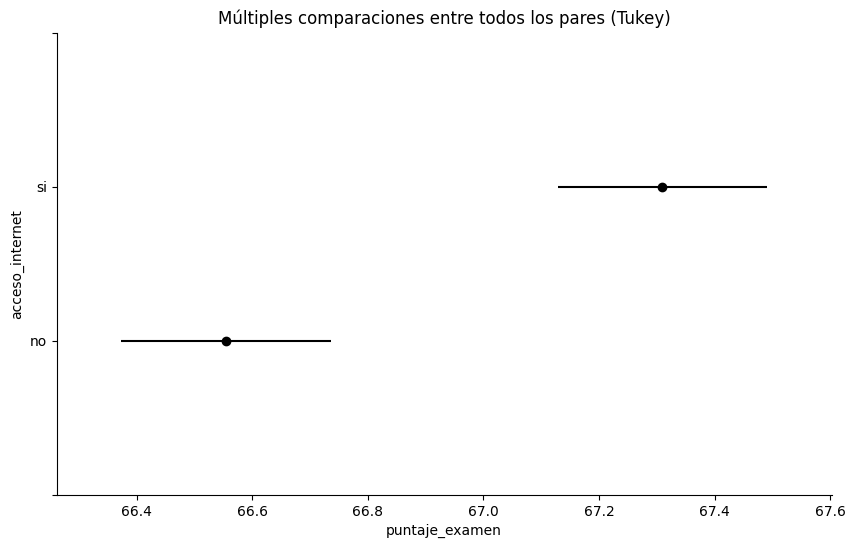

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['acceso_internet'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="acceso_internet", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(acceso_internet)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.004


ANOVA:
Se muestran diferecias significativas entre quienes tienen y no tienen acceso.
Tukey:
El grupo con acceso a internet obtuvo mejores resultados.

Eta cuadrado (η² = 0.004):
Se observa que el acceso a internet si influye, pero se explica muy poca variabilidad en el rendimiento

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   bajo elevado   0.9882    0.0  0.6717  1.3048   True
   bajo   medio   0.5178    0.0  0.2631  0.7725   True
elevado   medio  -0.4705 0.0015 -0.7873 -0.1536   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

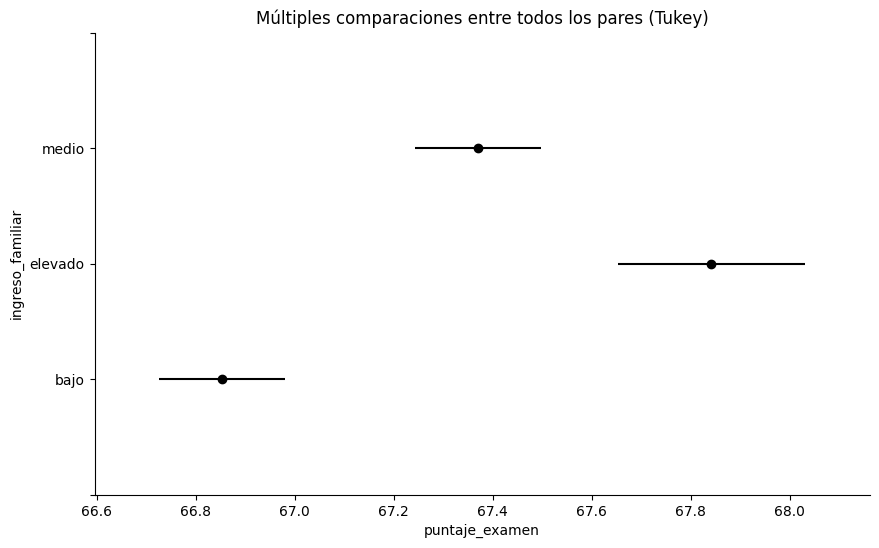

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['ingreso_familiar'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="ingreso_familiar", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(ingreso_familiar)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.011


ANOVA:
Si hay diferencias significativas en los niveles.

Tukey:En los grupos tienen diferencias entre sí y a mayor ingreso, mayor  el puntaje.

Eta cuadrado (η² = 0.011):
En el ingreso familiar hay relación con el rendimiento, pero con un efecto limitado.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
   bajo elevado   0.5447    0.0  0.2585  0.8309   True
   bajo   medio  -0.1345 0.4821 -0.4082  0.1392  False
elevado   medio  -0.6792    0.0 -0.9638 -0.3947   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

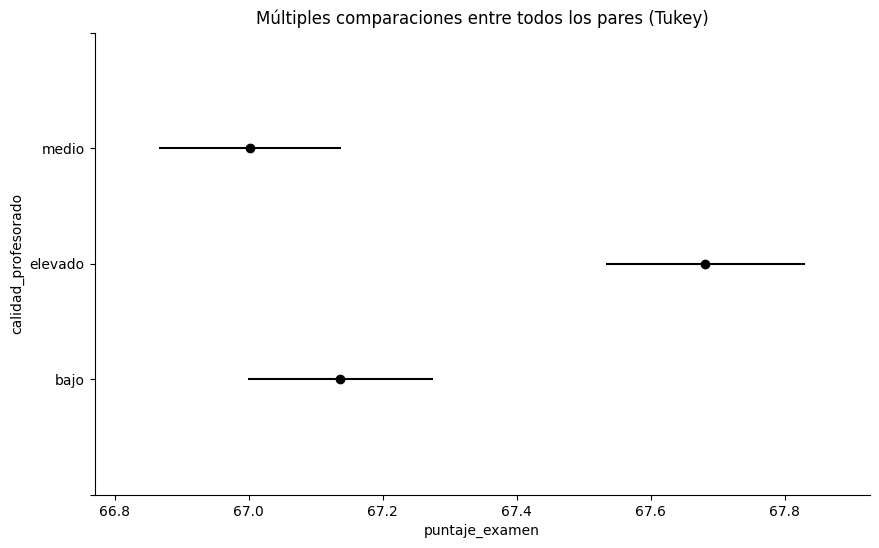

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['calidad_profesorado'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="calidad_profesorado", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(calidad_profesorado)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.005


ANOVA:
Aqui se detectaron que hay diferencias significativas entre niveles.
Tukey:
Existen diferencias entre las variables bajo–elevado y medio–elevado, pero no entre bajo y medio.

Eta cuadrado (η² = 0.005):
Se observa que la calidad del profesorado si influye solo cuando es muy alta, pero tiene un impacto que es bajo.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
privado publico  -0.0924 0.3855 -0.3011 0.1163  False
-----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

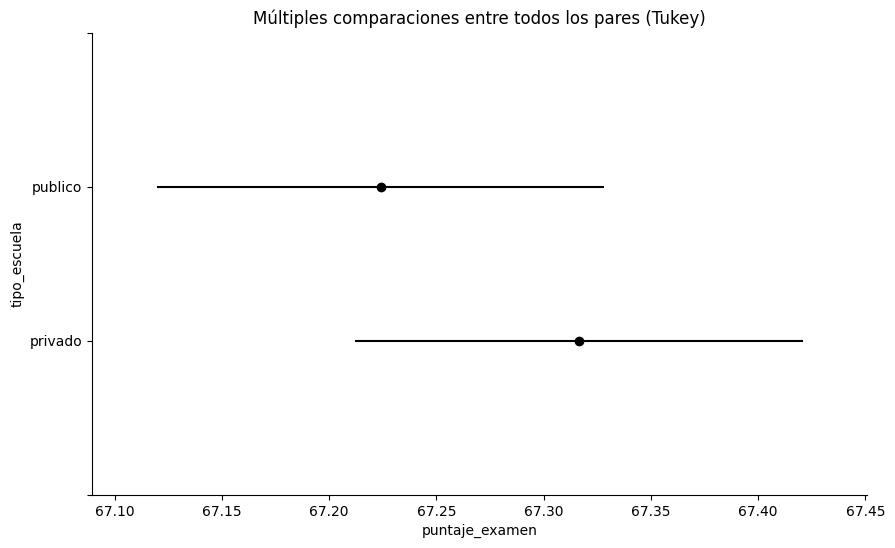

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['tipo_escuela'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="tipo_escuela", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(tipo_escuela)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.000


ANOVA:
Aqui no se encontraron las diferencias significativas.

Tukey:
Se observan que no existen diferencias significativas entre la escuela pública y la privada.

Eta cuadrado (η² ≈ 0.000):
Nos arroja que el tipo de escuela no influye en el puntaje o calificacion del examen.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
negativo  neutral   0.6329    0.0 0.3229 0.9429   True
negativo positivo   1.0538    0.0  0.745 1.3626   True
 neutral positivo   0.4209 0.0004 0.1638 0.6779   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

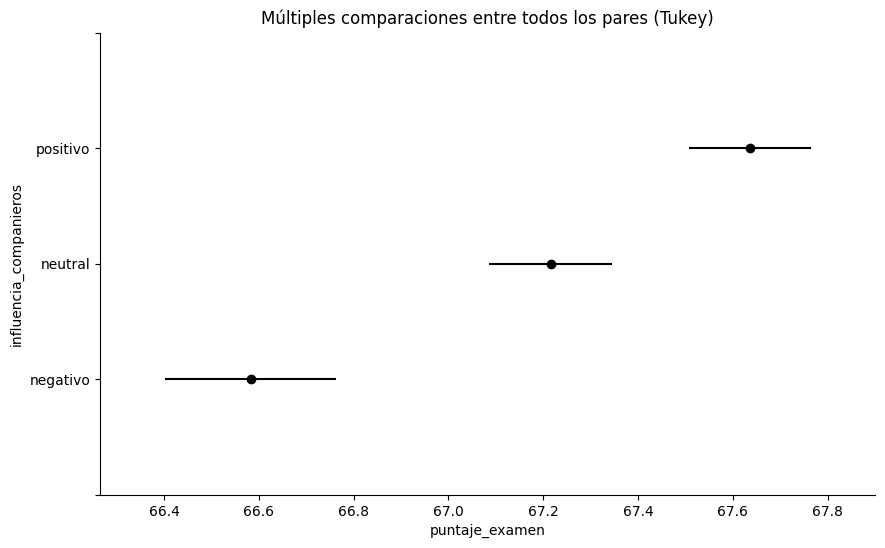

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['influencia_companieros'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="influencia_companieros", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(influencia_companieros)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.010


ANOVA:
Existen diferencias significativas entre los grupos.

Tukey:
Existen diferencias entre las variables (negativo, neutral y positivo), esto influencia y hace que sea positiva y se asocie con mejores puntajes.

Eta cuadrado (η² = 0.010):
La influencia de los compañeros si afecta en el rendimiento, aunque tiene un efecto limitado.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    no     si  -1.0725   0.0 -1.3852 -0.7598   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

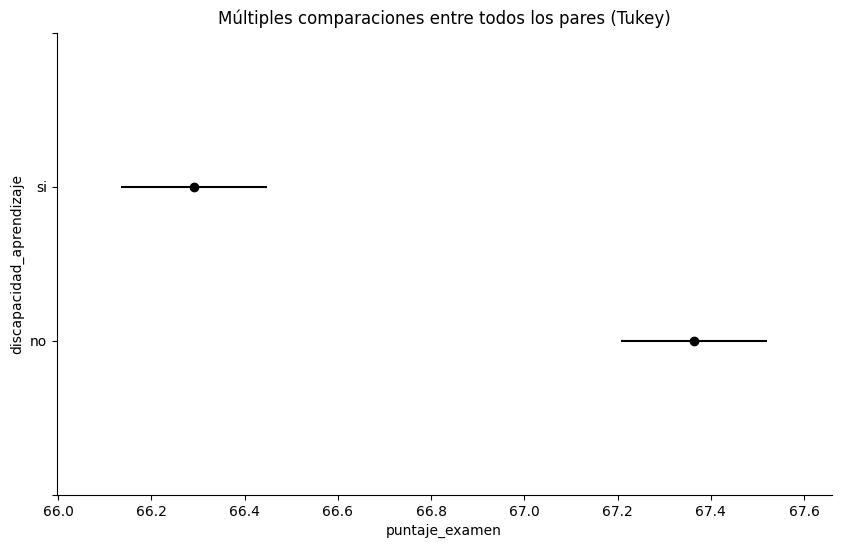

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['discapacidad_aprendizaje'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="discapacidad_aprendizaje", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(discapacidad_aprendizaje)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.005


ANOVA:
Hay diferencias significativas.

Tukey:
Se obseravn que los estudiantes que no tienen discapacidad obtienen mayores puntajes.

Eta cuadrado (η² = 0.005):
La discapacidad de aprendizaje si influye en la forma significativa.

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
    posgrado preparatoria  -1.0778    0.0 -1.3801 -0.7754   True
    posgrado  universidad  -0.6142    0.0 -0.9429 -0.2856   True
preparatoria  universidad   0.4635 0.0001  0.2002  0.7268   True
----------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

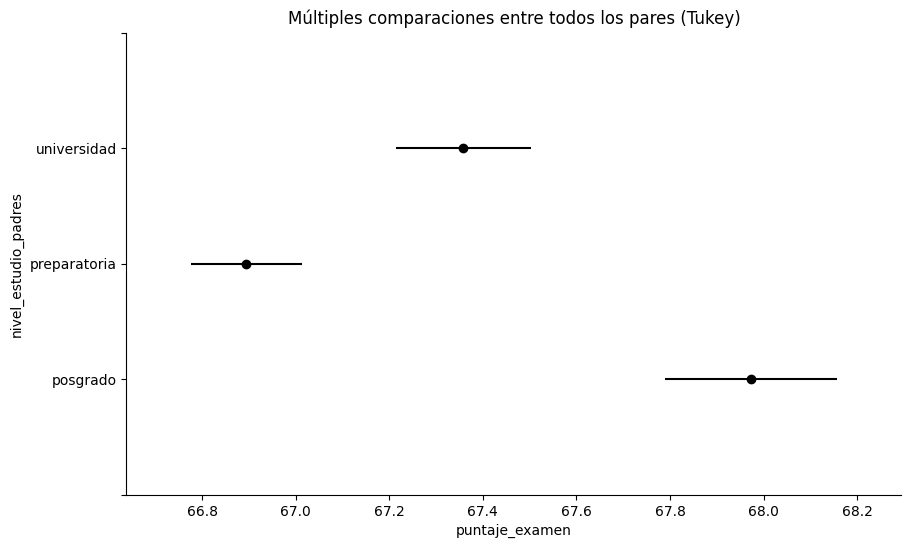

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['nivel_estudio_padres'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="nivel_estudio_padres", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(nivel_estudio_padres)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.010


ANOVA:
Si hay diferencias significativas entre todos los niveles.

Tukey:
Todos los niveles que se presentan tienen diferencias y mayor nivel educativo de los padres se relaciona con mejores puntajes.
 (η² = 0.010):
Se muestra que el nivel educativo de los padres sí influye, pero no es determinante.

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj  lower   upper  reject
------------------------------------------------------
cercano   lejano  -1.0154   0.0  -1.407 -0.6237   True
cercano moderado  -0.5272   0.0 -0.7822 -0.2722   True
 lejano moderado   0.4882 0.017  0.0705  0.9059   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

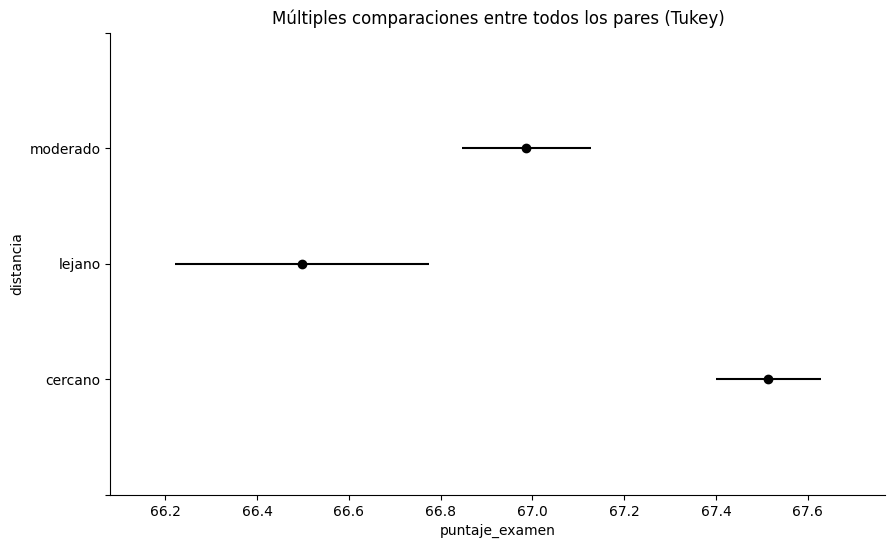

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['distancia'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="distancia", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(distancia)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.007


ANOVA:
Existen diferencias significativas entre las distancias.

Tukey:
Los grupos se difieren entre sí,y mayor distancia se asocia con menor rendimiento.

Eta cuadrado (η² = 0.007):
La distancia afecta significativamente el rendimiento, pero con impacto limitado.

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
hombre  mujer   0.0391 0.6937 -0.1555 0.2337  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

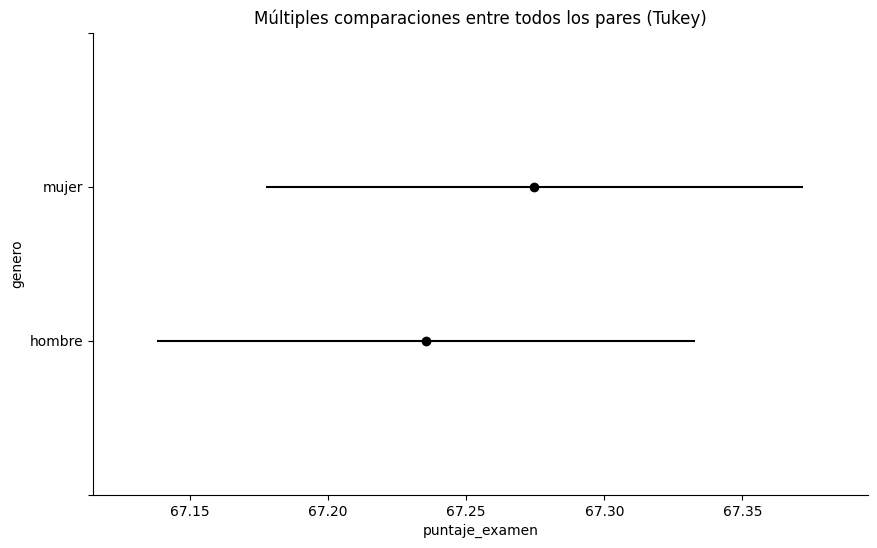

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['puntaje_examen'], groups=df['genero'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="genero", xlabel="puntaje_examen")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
# η² (eta cuadrado)	Tamaño del efecto
# ~0.01	              Pequeño
# ~0.06	              Mediano
# ~0.14 o más	        Grande

# Se interpreta como el coeficiente de determinación

# Estos valores pueden variar según la disciplina. En estudios de ciencias
# sociales, un η² de 0.06 puede ser muy significativo;
# en física o ingeniería, quizá se espera más.

eta_squared = tabla_anova['sum_sq']['C(genero)'] / tabla_anova['sum_sq'].sum()
print(f"η² (tamaño de efecto): {eta_squared:.3f}")

η² (tamaño de efecto): 0.000


ANOVA:
Aqui no se encontraron las diferencias significativas.

Tukey:
No hay diferencias entre hombres y mujeres.

Eta cuadrado (η² ≈ 0.000):
Se observa que el género no influye en el puntaje del examen.

**Conclusión**

Este estudio nos demuestra que diversos factores socioeconómicos, escolares y familiares influyen de manera significativa en el rendimiento académico. Aspectos como el acceso a datos, el nivel educativo de los padres, la distancia a la escuela y la presencia de programas de apoyo son determinantes clave. Por otro lado, variables como el género no muestran impacto significativo.

Los resultados obtenidos pueden ser utilizados por instituciones educativas para identificar grupos vulnerables y diseñar estrategias focalizadas que fomenten la equidad y mejoren el desempeño escolar. Programas de apoyo, acceso a tecnología y reducción de barreras estructurales podrían generar mejoras sustanciales en los estudiantes con menor rendimiento.